In [1]:
import os

import numpy as np

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

from ARGUS_taskid_inference import ARGUS_taskid_inference

In [2]:
taskid = ARGUS_taskid_inference(config_file_name="../ARGUS/ARGUS_taskid.cfg", network_name="final", device_num=0)


In [3]:
taskid_best_models = [0]

for r in range(taskid.num_models):
    model_name = os.path.join("Results", "taskid_run"+str(r), "best_model_"+str(taskid_best_models[r])+".pth")
    taskid.load_model(r, model_name)

In [21]:
#vid_img = ARGUS_load_video("../PTX/Data_PTX/original/BAMC-PTXNoSliding/025ns_Image_262499828648_clean.mp4")
#vid_img = ARGUS_load_video("../PNB/Data_PNB/original/Positives/189/3. 189 AC_Video 2.mp4")
#vid_img = ARGUS_load_video("../ONSD/Data_ONSD/original/Positives/66/4. 66.1 Right_Long_Video 1.mp4")
vid_img = ARGUS_load_video("../ETT/Data_ETT/original/Positives/161/2. 161A_Video.mp4")


In [22]:
print(vid_img.shape)

(439, 1080, 912)


In [23]:
taskid.preprocess(vid_img, lbl_img=None, slice_num=None, scale_data=True, rotate_data=False)

(1, 256, 256)
1


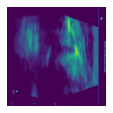

In [24]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

arr = taskid.input_array
print(arr.shape)
num_channels = arr.shape[0]
print(num_channels)
plt.figure()
for c in range(num_channels):
    plt.subplot(
        2,
        num_channels + 1,
        (num_channels + 1) + c + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(arr[c, :, :],270))
plt.show()

In [25]:
taskid.inference()

(3, array([0.        , 0.05508256, 0.27069952, 0.67421792]))